## Import Library

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Modul Keras dari TensorFlow

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras import datasets

## Import Modul SKlearn

In [50]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

## Read Dataset

In [51]:
df = pd.read_csv("census.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [52]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [53]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Data Splitting

In [54]:
X = df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]
Y = df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1 , random_state = 0)

In [56]:
X_test.shape

(4885, 6)

In [57]:
Y_test.shape

(4885, 6)

In [58]:
X_train.shape

(43957, 6)

In [59]:
Y_train.shape

(43957, 6)

## Membuat Model

In [60]:
model_mnist = Sequential()

### Membuat Input Layer

In [61]:
model_mnist.add(Dense(512, activation='relu', input_dim = 6))

### Membuat hidden Layer

In [62]:
model_mnist.add(Dense(256, activation='relu'))
model_mnist.add(Dense(128, activation='relu'))

### Membuat Output Layer

In [63]:
model_mnist.add(Dense(6, activation='softmax'))

# Model Summary

In [64]:
model_mnist.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               3584      
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 6)                 774       
                                                                 
Total params: 168,582
Trainable params: 168,582
Non-trainable params: 0
_________________________________________________________________


# Compile Model

In [65]:
model_mnist.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

In [66]:
hasil = model_mnist.fit(
    X_train, 
    Y_train, 
    epochs = 10, 
    batch_size = 128, 
    validation_data = (X_test, Y_test)
)

Epoch 1/10
344/344 [==============================] - 2s 5ms/step - loss: 7874359590912.0000 - accuracy: 0.9964 - val_loss: 49089303543808.0000 - val_accuracy: 0.9984
Epoch 2/10
344/344 [==============================] - 1s 4ms/step - loss: 302752781565952.0000 - accuracy: 0.9993 - val_loss: 811005588275200.0000 - val_accuracy: 0.9984
Epoch 3/10
344/344 [==============================] - 1s 4ms/step - loss: 1970510728527872.0000 - accuracy: 0.9993 - val_loss: 3705069912457216.0000 - val_accuracy: 0.9984
Epoch 4/10
344/344 [==============================] - 1s 4ms/step - loss: 6515145412968448.0000 - accuracy: 0.9993 - val_loss: 10657902289223680.0000 - val_accuracy: 0.9984
Epoch 5/10
344/344 [==============================] - 1s 4ms/step - loss: 16152445361061888.0000 - accuracy: 0.9993 - val_loss: 23471523826237440.0000 - val_accuracy: 0.9984
Epoch 6/10
344/344 [==============================] - 1s 4ms/step - loss: 31665204735508480.0000 - accuracy: 0.9993 - val_loss: 4368405223807385

In [67]:
hasil.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

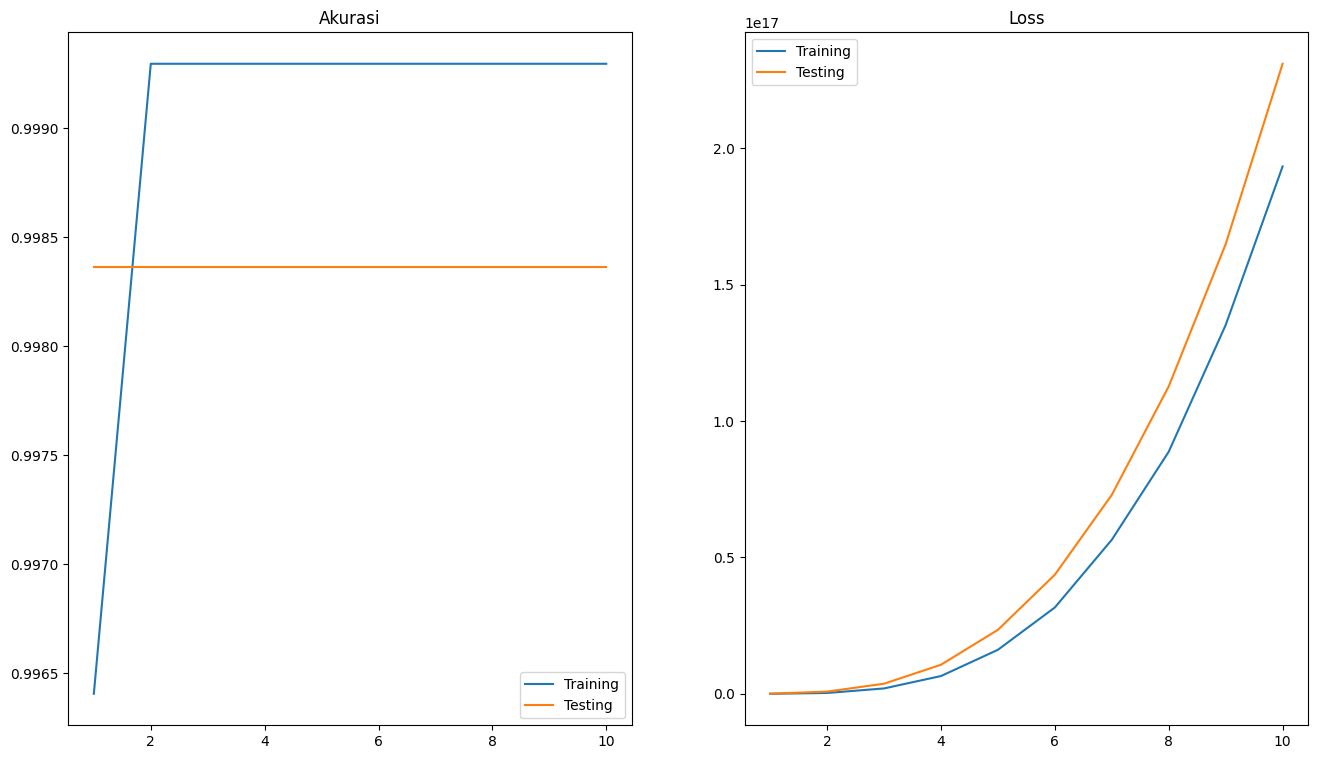

In [68]:
plt.figure(figsize=(16,9))

epochs_run = [i+1 for i in range(10)]

# Akurasi
plt.subplot(1,2,1)
plt.plot(epochs_run, hasil.history['accuracy'], label='Training')
plt.plot(epochs_run, hasil.history['val_accuracy'], label='Testing')
plt.title("Akurasi")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs_run, hasil.history['loss'], label='Training')
plt.plot(epochs_run, hasil.history['val_loss'], label='Testing')
plt.title("Loss")
plt.legend()

plt.show()

## Evaluasi Model

In [69]:
score = model_mnist.evaluate(X_test, Y_test)
print("Loss :",score[0])
print("Training :",score[1])

153/153 [==============================] - 0s 2ms/step - loss: 231070357216296960.0000 - accuracy: 0.9984
Loss : 2.3107035721629696e+17
Training : 0.9983623623847961


In [70]:
print("Akurasi :", hasil.history["accuracy"][-1] * 100, "%")
print("Akurasi validasi :", hasil.history["val_accuracy"][-1] * 100, "%")

Akurasi : 99.92947578430176 %
Akurasi validasi : 99.83623623847961 %
